In [7]:
!pip install mglearn

  Obtaining dependency information for mglearn from https://files.pythonhosted.org/packages/bb/8b/687d30a3df6b870af541dde6327423e35713e38243db135f57b4ebd054f3/mglearn-0.2.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ----- ---------------------------------- 81.9/581.4 kB 1.5 MB/s eta 0:00:01
   ---------------- ----------------------- 245.8/581.4 kB 2.5 MB/s eta 0:00:01
   ---------------------------------- ----- 501.8/581.4 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 581.4/581.4 kB 3.3 MB/s eta 0:00:00


In [18]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

x shape (26, 2)


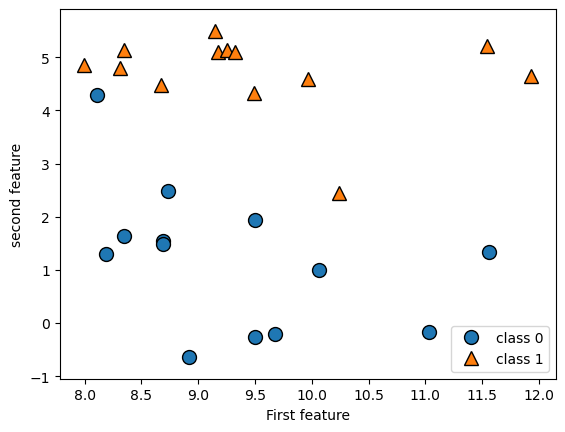

In [19]:
x,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.legend(["class 0","class 1"],loc = 4)
plt.xlabel("First feature")
plt.ylabel("second feature")
print("x shape",x.shape)

Text(0, 0.5, 'Target')

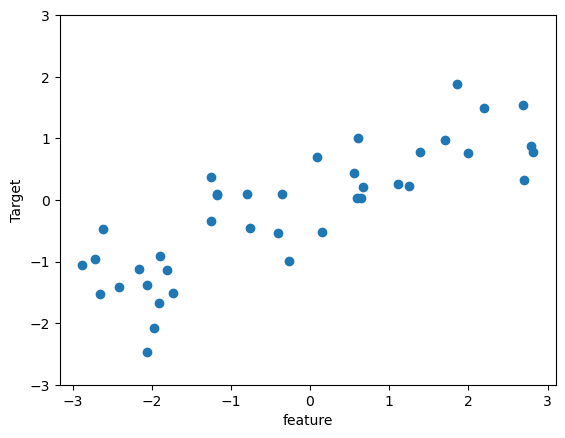

In [20]:
x,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(x,y,'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("Target")

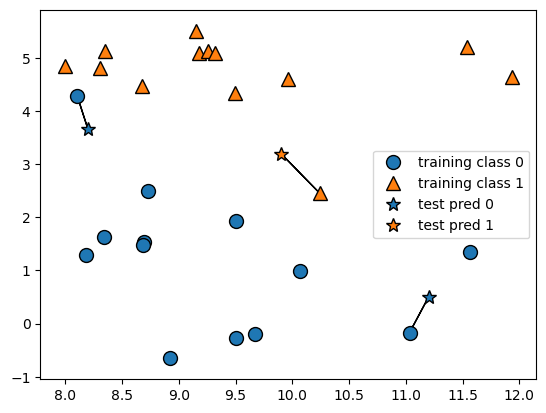

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

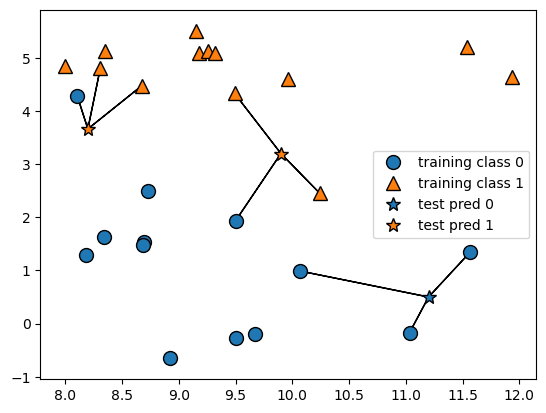

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [23]:
from sklearn.model_selection import train_test_split
x,y = mglearn.datasets.make_forge()
display(x)
display(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
print ("test set predictions:",clf.predict(x_test))

test set predictions: [1 0 1 0 1 0 0]


In [27]:
print("test set accuracy; {:.2f}".format(clf.score(x_test,y_test)))

test set accuracy; 0.86


In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print ("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [29]:
print("shape of cancer data:",cancer.data.shape)

shape of cancer data: (569, 30)


In [30]:
import numpy as np
print("sample counts per class:\n",{n: v for n, v in zip (cancer.target_names,np.bincount(cancer.target))})

sample counts per class:
 {'malignant': 212, 'benign': 357}


In [31]:
print("feature names:",cancer.feature_names)

feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


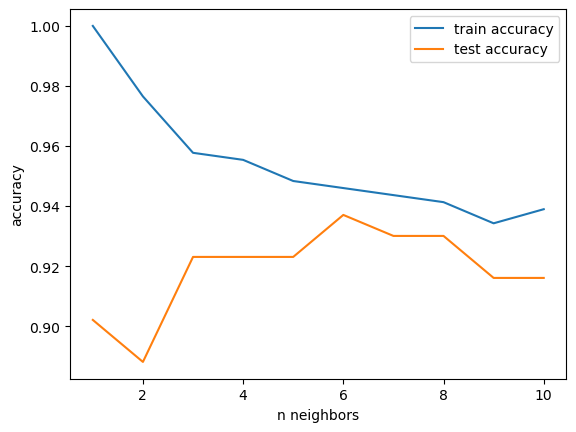

In [32]:
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n_neighbors1 in neighbors_settings:
 clf = KNeighborsClassifier(n_neighbors = n_neighbors1)
 clf.fit(x_train,y_train)
 training_accuracy.append(clf.score(x_train,y_train))
 test_accuracy.append(clf.score(x_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label = "train accuracy")
plt.plot(neighbors_settings,test_accuracy,label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n neighbors")
plt.legend()

In [33]:
test_accuracy[7]

0.9300699300699301